In [7]:
import pandas as pd
import numpy as np


In [8]:
import pandas as pd
import numpy as np
# read dataset
file_path = "Downloads/Advertising_dataset_with_character_target.csv"  
df = pd.read_csv(file_path)

# check the head lines
print("the head lines：")
display(df.head())



the head lines：


,user_id,Unnamed: 1,device_type,location,age_group,gender,ad_id,content_type,ad_topic,ad_target_audience,click_through_rate,conversion_rate,engagement_level,view_time,cost_per_click,click_through_rate.1,conversion_rate.1,ROI_Category
0,184,NaN,Desktop,USA,55+,Female,A5604,Text,Health,Young Adults,0.069629,0.0366,Liked,33,1.08,0.069629,0.0366,Low
1,425,NaN,Desktop,UK,35-44,Female,A4649,Image,Fashion,Family Oriented,0.043579,0.1482,Commented,12,1.00,0.043579,0.1482,Low
2,919,NaN,Mobile,Germany,45-54,Male,A6448,Video,Automotive,Travel Lovers,0.038420,0.0742,Commented,16,0.97,0.038420,0.0742,Low
3,336,NaN,Mobile,Canada,55+,Male,A1966,Image,Fashion,Young Adults,0.043683,0.0590,Commented,14,0.53,0.043683,0.0590,Low
4,607,NaN,Mobile,Canada,45-54,Male,A5216,Video,Electronics,Family Oriented,0.042209,0.1042,Liked,48,0.59,0.042209,0.1042,Low


In [11]:
# 1. basic stats infor
# ======================
print("scale (row x line):", df.shape)
print("\n数据类型与缺失值情况data-type and missing:")
print(df.info())
print("\n缺失值统计calculate missing:")
print(df.isnull().sum())

# ======================
# 2. Repetition check
# ======================
if "user_id" in df.columns:
    dup_count = df.duplicated(subset="user_id").sum()
    print(f"\n重复 user_id count: {dup_count}")
else:
    print("\n没有 user_id 列，跳过重复值检查。")


scale (row x line): (1000, 18)

数据类型与缺失值情况data-type and missing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   Unnamed: 1            0 non-null      float64
 2   device_type           1000 non-null   object 
 3   location              1000 non-null   object 
 4   age_group             1000 non-null   object 
 5   gender                1000 non-null   object 
 6   ad_id                 1000 non-null   object 
 7   content_type          1000 non-null   object 
 8   ad_topic              1000 non-null   object 
 9   ad_target_audience    1000 non-null   object 
 10  click_through_rate    1000 non-null   float64
 11  conversion_rate       1000 non-null   float64
 12  engagement_level      1000 non-null   object 
 13  view_time             1000 non-null   int64  
 14  cost_per

In [13]:
# 3. descriptive
# ======================
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\ndescriptive information:")
display(df[num_cols].describe().T)



descriptive information:


,count,mean,std,min,25%,50%,75%,max
user_id,1000.0,562.659000,258.779821,101.000000,345.000000,566.500000,798.000000,998.000000
Unnamed: 1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
click_through_rate,1000.0,0.078787,0.040027,0.010162,0.044339,0.077857,0.112137,0.149844
conversion_rate,1000.0,0.080213,0.040322,0.010100,0.044100,0.080650,0.115225,0.150000
view_time,1000.0,35.204000,14.597996,10.000000,23.000000,36.000000,48.000000,60.000000
cost_per_click,1000.0,0.790420,0.404051,0.100000,0.440000,0.790000,1.132500,1.500000
click_through_rate.1,1000.0,0.078787,0.040027,0.010162,0.044339,0.077857,0.112137,0.149844
conversion_rate.1,1000.0,0.080213,0.040322,0.010100,0.044100,0.080650,0.115225,0.150000


In [14]:
# 4. type of column
# ======================
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("\ncolumn Top-10 count:")
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).head(10))



column Top-10 count:

--- device_type ---
device_type
Desktop    344
Mobile     338
Tablet     318
Name: count, dtype: int64

--- location ---
location
Germany    220
UK         206
USA        202
Canada     188
India      184
Name: count, dtype: int64

--- age_group ---
age_group
55+      233
25-34    201
18-24    192
35-44    187
45-54    187
Name: count, dtype: int64

--- gender ---
gender
Male      504
Female    496
Name: count, dtype: int64

--- ad_id ---
ad_id
A1227    3
A2886    3
A5698    3
A8721    3
A5747    2
A8156    2
A6782    2
A4205    2
A4353    2
A3198    2
Name: count, dtype: int64

--- content_type ---
content_type
Image    356
Text     325
Video    319
Name: count, dtype: int64

--- ad_topic ---
ad_topic
Fashion        205
Travel         205
Health         199
Electronics    199
Automotive     192
Name: count, dtype: int64

--- ad_target_audience ---
ad_target_audience
Travel Lovers       212
Young Adults        208
Family Oriented     208
Fitness Lovers      187
T

In [15]:
# 5. the column for analysis
# ======================
# conversion-rate
if "conversion_rate" in df.columns:
    print("\nconversion_rate descriptive:")
    print(df["conversion_rate"].describe())
    print


conversion_rate descriptive:
count    1000.000000
mean        0.080213
std         0.040322
min         0.010100
25%         0.044100
50%         0.080650
75%         0.115225
max         0.150000
Name: conversion_rate, dtype: float64


In [22]:
# confirm conversion_rate is numurous 
df["conversion_rate"] = pd.to_numeric(df["conversion_rate"], errors="coerce")

# segment by target audience 
audience_stats = (
    df.groupby("ad_target_audience")
    .agg(
        n_ads = ("conversion_rate", "count"),       # sample size
        mean_cr = ("conversion_rate", "mean"),      # average conversion rate
        median_cr = ("conversion_rate", "median"),  # median of conversion rate
        min_cr = ("conversion_rate", "min"),        # minimum conversion rate
        max_cr = ("conversion_rate", "max")         # maximum conversion rate
    )
    .reset_index()
    .sort_values("mean_cr", ascending=False)
)

print("conversion rate by audience type")
display(audience_stats)

conversion rate by audience type


,ad_target_audience,n_ads,mean_cr,median_cr,min_cr,max_cr
1,Fitness Lovers,187,0.087109,0.08910,0.0101,0.1499
4,Young Adults,208,0.083557,0.08355,0.0101,0.1500
3,Travel Lovers,212,0.078194,0.08135,0.0109,0.1482
2,Tech Enthusiasts,185,0.076965,0.07000,0.0109,0.1491
0,Family Oriented,208,0.075616,0.07215,0.0102,0.1498


In [23]:
# top two audiences with the highest conversion rate
top2_audiences = audience_stats.head(2)["ad_target_audience"].tolist()
print("\ntop-two-audience-with-highest-convrsion-rate:", top2_audiences)



top-two-audience-with-highest-convrsion-rate: ['Fitness Lovers', 'Young Adults']



=== Fitness Lovers 分布分析 ===
sample-size: 187


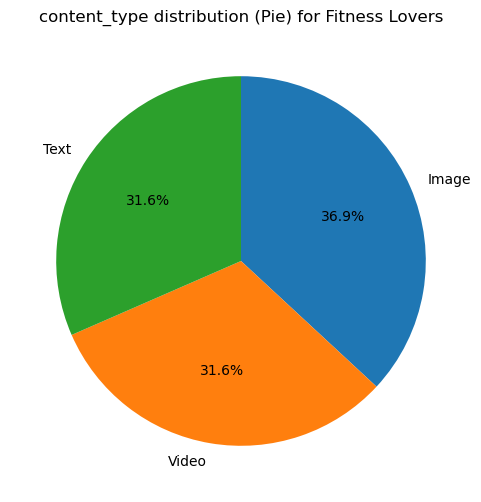

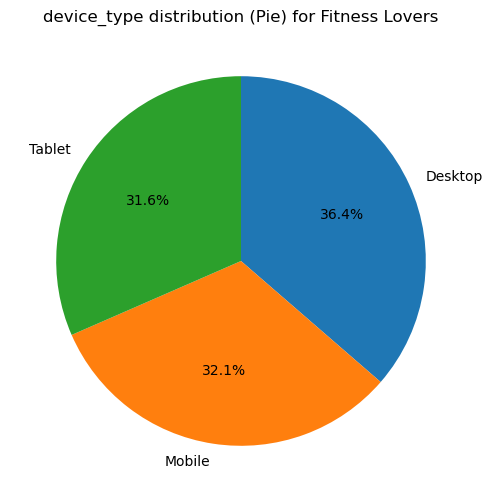

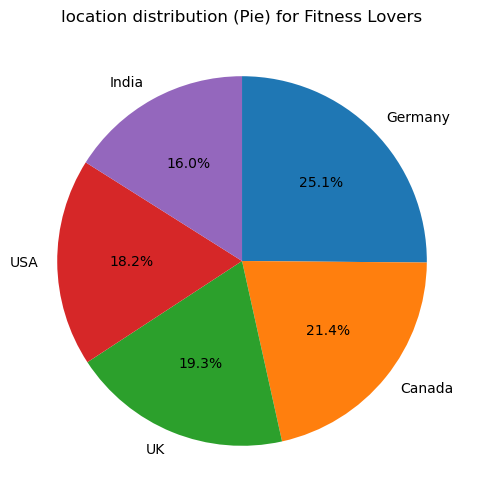

⚠️ if no audience_type ，ignore

=== Young Adults 分布分析 ===
sample-size: 208


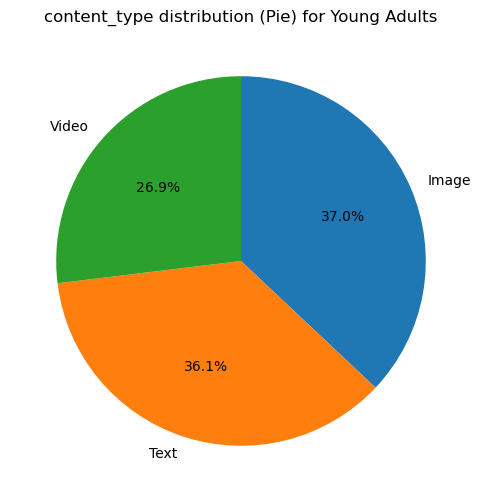

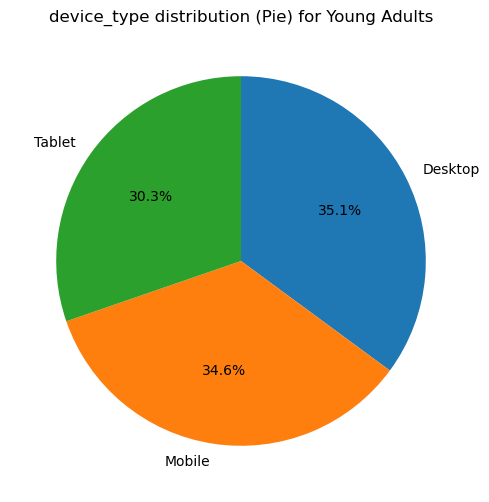

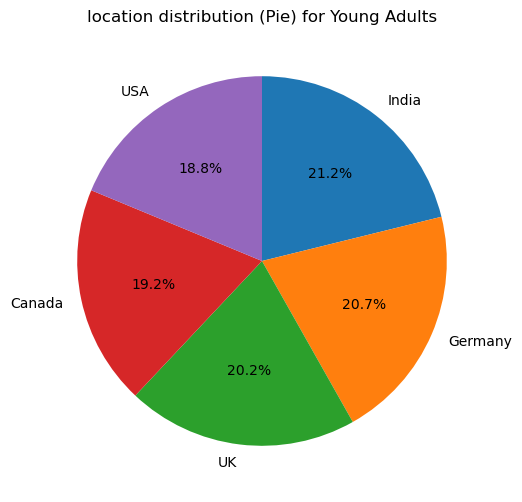

⚠️ if no audience_type ，ignore


In [33]:

import matplotlib.pyplot as plt

feature_cols = ["content_type", "device_type", "location", "audience_type"]
def plot_distribution(sub_df, col, audience):
    counts = sub_df[col].value_counts(normalize=True) * 100
    n_categories = len(counts)

    plt.figure(figsize=(6,6))
    if n_categories <= 5:
        # pie chart
        plt.pie(
            counts, 
            labels=counts.index, 
            autopct="%1.1f%%", 
            startangle=90,
            counterclock=False
        )
        plt.title(f"{col} distribution (Pie) for {audience}")
    else:
        # bar-chart
        counts.plot(kind="bar")
        plt.title(f"{col} distribution (Bar) for {audience}")
        plt.ylabel("Percentage (%)")
        plt.xticks(rotation=45, ha="right")
    plt.show()

# graphs for Top Two audience 
for audience in top2_audiences:
    print(f"\n=== {audience} 分布分析 ===")
    sub_df = df[df["ad_target_audience"] == audience]
    print(f"sample-size: {len(sub_df)}")

    for col in feature_cols:
        if col in df.columns:
            plot_distribution(sub_df, col, audience)
        else:
            print(f"⚠️ if no {col} ，ignore")


=== Fitness Lovers 分布分析 ===
sample-size: 187


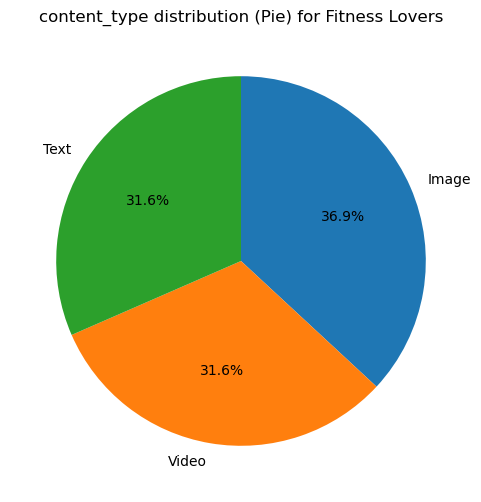

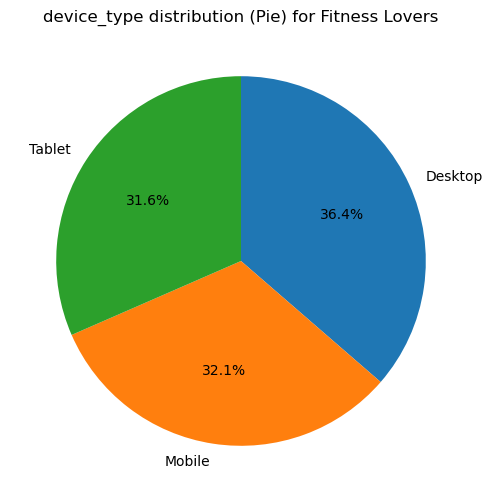

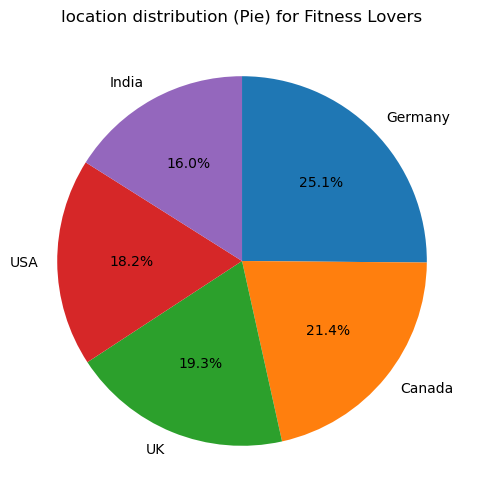

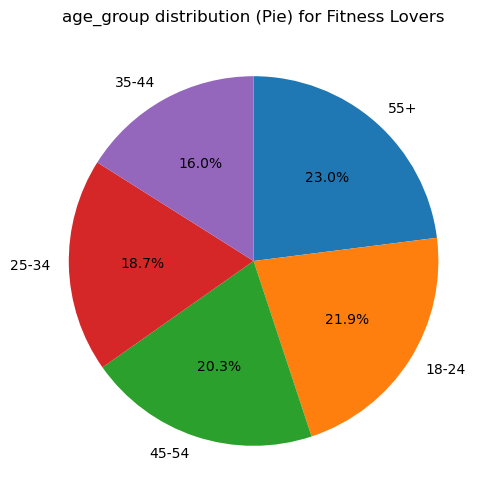


=== Young Adults 分布分析 ===
sample-size: 208


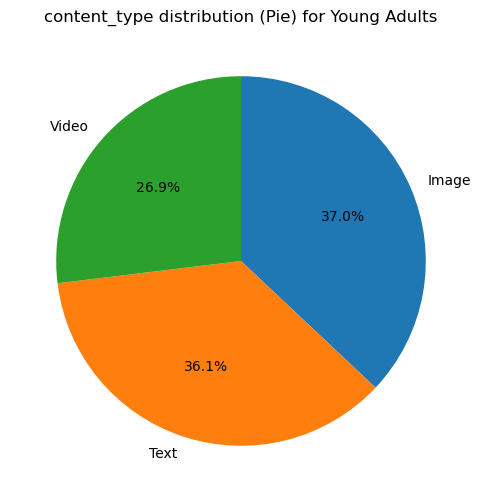

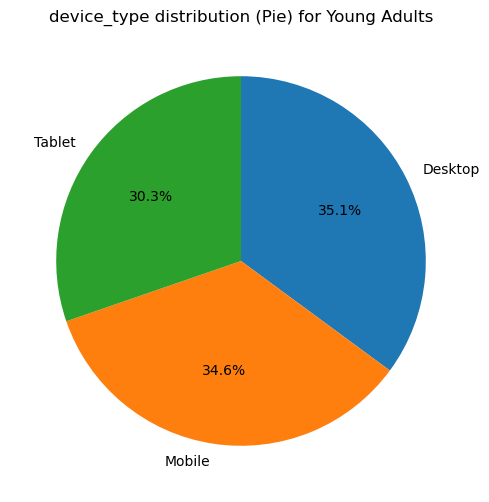

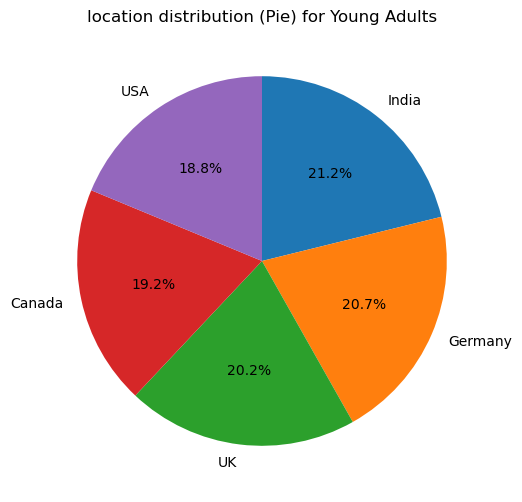

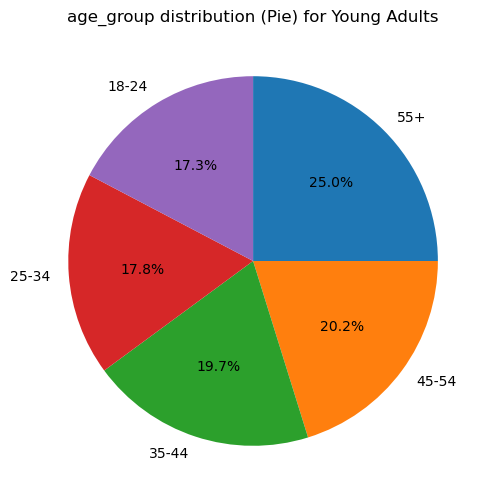

In [27]:
import matplotlib.pyplot as plt

def plot_distribution(sub_df, col, audience):
    counts = sub_df[col].value_counts(normalize=True) * 100
    n_categories = len(counts)

    plt.figure(figsize=(6,6))
    if n_categories <= 5:
        # pie chart
        plt.pie(
            counts, 
            labels=counts.index, 
            autopct="%1.1f%%", 
            startangle=90,
            counterclock=False
        )
        plt.title(f"{col} distribution (Pie) for {audience}")
    else:
        # bar-chart
        counts.plot(kind="bar")
        plt.title(f"{col} distribution (Bar) for {audience}")
        plt.ylabel("Percentage (%)")
        plt.xticks(rotation=45, ha="right")
    plt.show()

# graphs for Top Two audience 
for audience in top2_audiences:
    print(f"\n=== {audience} 分布分析 ===")
    sub_df = df[df["ad_target_audience"] == audience]
    print(f"sample-size: {len(sub_df)}")

    for col in feature_cols:
        if col in df.columns:
            plot_distribution(sub_df, col, audience)
        else:
            print(f"⚠️ if no {col} ，ignore")


=== Fitness Lovers 分布分析 ===
样本量: 187


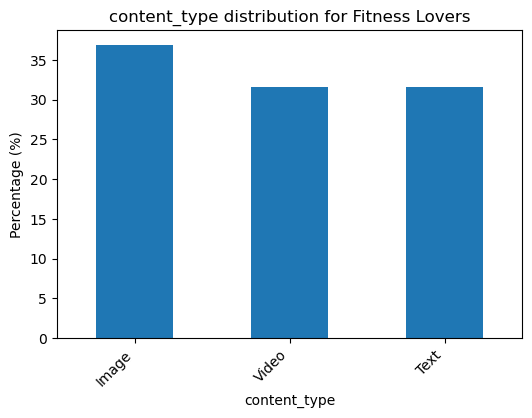

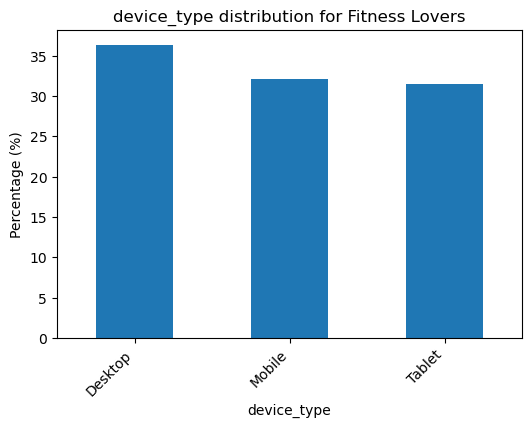

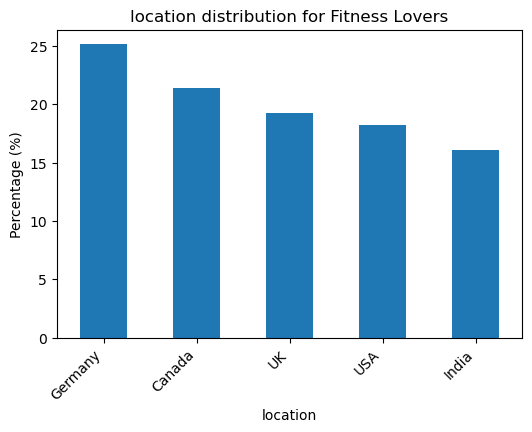

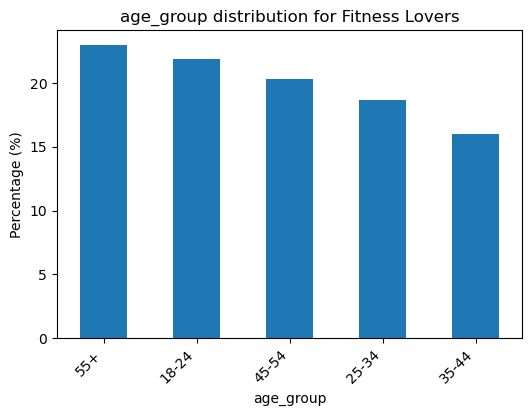


=== Young Adults 分布分析 ===
样本量: 208


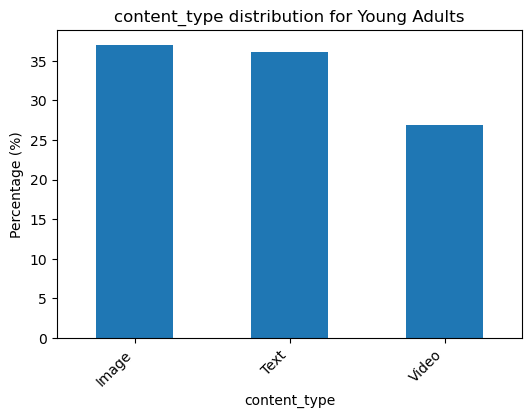

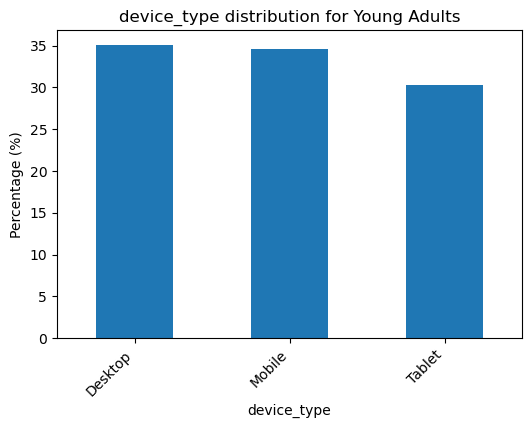

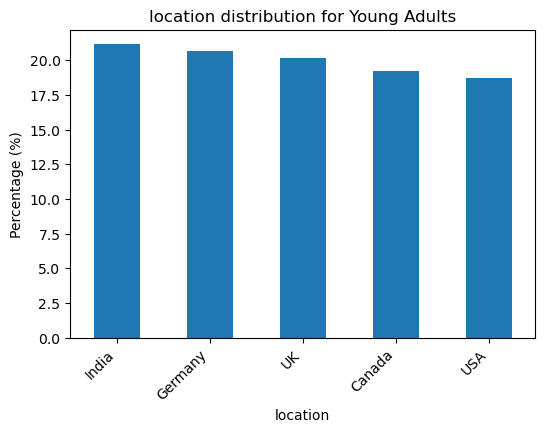

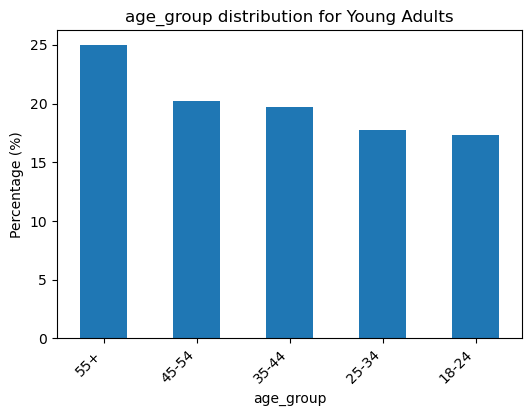

In [26]:
import matplotlib.pyplot as plt

# analysis demension
feature_cols = ["content_type", "device_type", "location", "age_group"]

def plot_distribution(sub_df, col, audience):
    """画单个 audience 的分布图"""
    counts = sub_df[col].value_counts(normalize=True) * 100  
    plt.figure(figsize=(6,4))
    counts.plot(kind="bar")
    plt.title(f"{col} distribution for {audience}")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45, ha="right")
    plt.show()

# graphs for Top audience 
for audience in top2_audiences:
    print(f"\n=== {audience} 分布分析 ===")
    sub_df = df[df["ad_target_audience"] == audience]
    print(f"样本量: {len(sub_df)}")

    for col in feature_cols:
        if col in df.columns:
            plot_distribution(sub_df, col, audience)
        else:
            print(f"⚠️ 数据中没有 {col} 列，跳过。")

In [28]:
# analysis demension
feature_cols = ["content_type", "device_type", "location", "age_group"]

# store results
dist_tables = {}

for col in feature_cols:
    sub = df[df["ad_target_audience"].isin(top2_audiences)]
    counts = (
        sub.groupby(["ad_target_audience", col])
        .size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum() * 100)  
        .round(2)
        .unstack(level=0)  # expand audience into column
        .fillna(0)
    )
    dist_tables[col] = counts
    print(f"\n=== {col} 分布对比 (%) ===")
    display(counts)


=== content_type 分布对比 (%) ===


ad_target_audience               Fitness Lovers  Young Adults
ad_target_audience content_type                              
Fitness Lovers     Image                  36.90          0.00
                   Text                   31.55          0.00
                   Video                  31.55          0.00
Young Adults       Image                   0.00         37.02
                   Text                    0.00         36.06
                   Video                   0.00         26.92


=== device_type 分布对比 (%) ===


ad_target_audience              Fitness Lovers  Young Adults
ad_target_audience device_type                              
Fitness Lovers     Desktop               36.36          0.00
                   Mobile                32.09          0.00
                   Tablet                31.55          0.00
Young Adults       Desktop                0.00         35.10
                   Mobile                 0.00         34.62
                   Tablet                 0.00         30.29


=== location 分布对比 (%) ===


ad_target_audience           Fitness Lovers  Young Adults
ad_target_audience location                              
Fitness Lovers     Canada             21.39          0.00
                   Germany            25.13          0.00
                   India              16.04          0.00
                   UK                 19.25          0.00
                   USA                18.18          0.00
Young Adults       Canada              0.00         19.23
                   Germany             0.00         20.67
                   India               0.00         21.15
                   UK                  0.00         20.19
                   USA                 0.00         18.75


=== age_group 分布对比 (%) ===


ad_target_audience            Fitness Lovers  Young Adults
ad_target_audience age_group                              
Fitness Lovers     18-24               21.93          0.00
                   25-34               18.72          0.00
                   35-44               16.04          0.00
                   45-54               20.32          0.00
                   55+                 22.99          0.00
Young Adults       18-24                0.00         17.31
                   25-34                0.00         17.79
                   35-44                0.00         19.71
                   45-54                0.00         20.19
                   55+                  0.00         25.00

In [30]:
import pandas as pd
import numpy as np

# —— demension to drill down into ——
feature_cols = ["content_type", "device_type", "location", "age_group"]

# —— conversion_rate  ——
df["conversion_rate"] = pd.to_numeric(df["conversion_rate"], errors="coerce")



# === 1) drill-down for different audience：conversion rate and sample size ===
def drilldown_one_audience(df, audience, col):
    sub = df[df["ad_target_audience"] == audience]
    out = (sub
           .groupby(col)
           .agg(n=("conversion_rate","count"),
                mean_cr=("conversion_rate","mean"),
                median_cr=("conversion_rate","median"))
           .sort_values("mean_cr", ascending=False))
    # 2 d.p
    out["mean_cr"]   = (out["mean_cr"]   * 100).round(2)
    out["median_cr"] = (out["median_cr"] * 100).round(2)
    return out

for audience in top2_audiences:
    print(f"\n================  drill-down：{audience}  ================")
    for col in feature_cols:
        if col in df.columns:
            print(f"\n[{col}] conversion-rate（%）sample-size：")
            display(drilldown_one_audience(df, audience, col))
        else:
            print(f"⚠️ 缺少列：{col}，跳过。")


================  drill-down：Fitness Lovers  ================

[content_type] conversion-rate（%）sample-size：


,n,mean_cr,median_cr
content_type,,,
Image,69,8.78,9.23
Video,59,8.72,8.78
Text,59,8.63,8.91



[device_type] conversion-rate（%）sample-size：


,n,mean_cr,median_cr
device_type,,,
Tablet,59,9.42,10.86
Desktop,68,8.42,8.67
Mobile,60,8.34,8.42



[location] conversion-rate（%）sample-size：


,n,mean_cr,median_cr
location,,,
USA,34,9.62,10.86
Canada,40,9.00,8.91
India,30,8.65,8.30
UK,36,8.33,8.56
Germany,47,8.13,8.94



[age_group] conversion-rate（%）sample-size：


,n,mean_cr,median_cr
age_group,,,
55+,43,9.40,10.45
35-44,30,9.00,8.74
25-34,35,8.94,9.45
18-24,41,8.45,9.23
45-54,38,7.77,7.37



================  drill-down：Young Adults  ================

[content_type] conversion-rate（%）sample-size：


,n,mean_cr,median_cr
content_type,,,
Text,75,8.85,9.20
Image,77,8.54,8.80
Video,56,7.44,7.49



[device_type] conversion-rate（%）sample-size：


,n,mean_cr,median_cr
device_type,,,
Tablet,63,8.62,9.14
Desktop,73,8.31,8.06
Mobile,72,8.18,8.07



[location] conversion-rate（%）sample-size：


,n,mean_cr,median_cr
location,,,
India,44,9.60,10.69
UK,42,8.88,8.62
Canada,40,8.28,7.95
Germany,43,7.55,8.34
USA,39,7.36,7.16



[age_group] conversion-rate（%）sample-size：


,n,mean_cr,median_cr
age_group,,,
35-44,41,8.79,7.98
18-24,36,8.50,9.18
55+,52,8.41,8.85
25-34,37,8.18,9.42
45-54,42,7.89,7.81


column-categorisation： ['ad_target_audience', 'content_type', 'device_type', 'location', 'age_group'] sample-size： 1000
[regression-tree] R^2: -0.0255  MAE: 0.036056


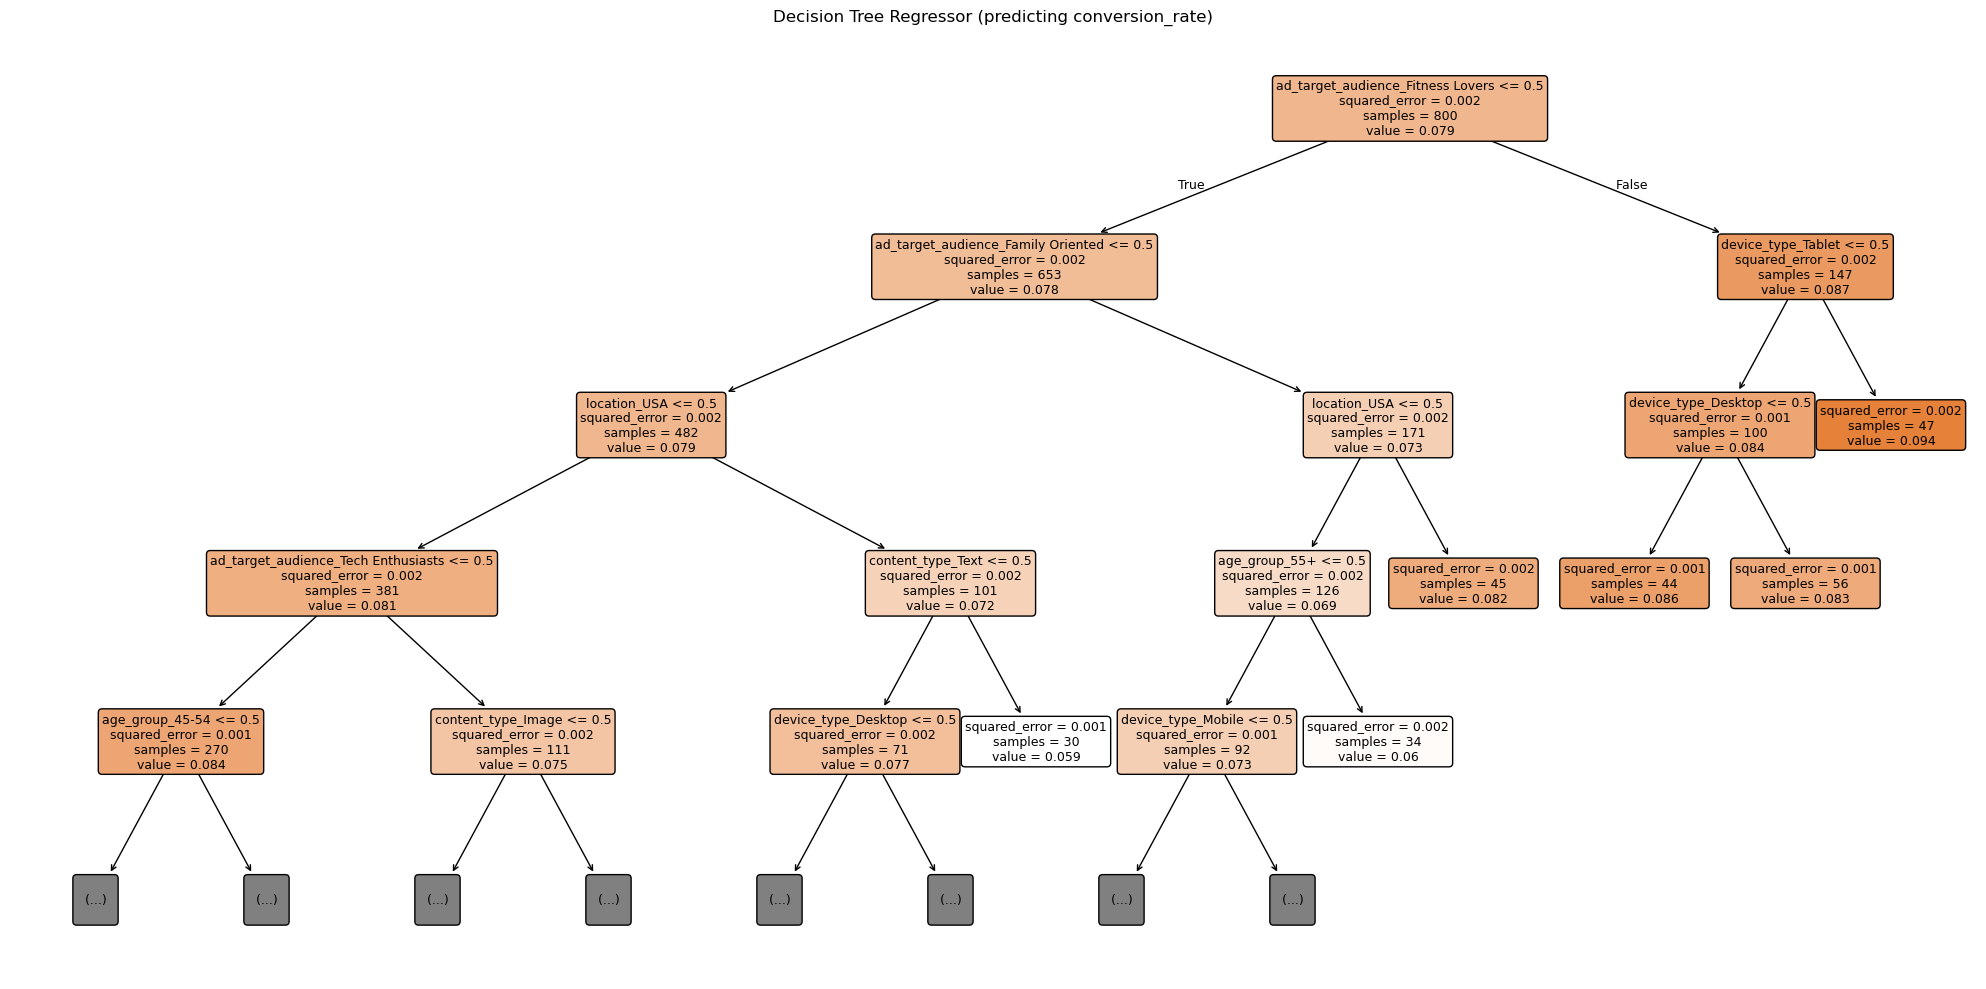


[回归树] 前3层规则：
 |--- ad_target_audience_Fitness Lovers <= 0.50
|   |--- ad_target_audience_Family Oriented <= 0.50
|   |   |--- location_USA <= 0.50
|   |   |   |--- ad_target_audience_Tech Enthusiasts <= 0.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- ad_target_audience_Tech Enthusiasts >  0.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- location_USA >  0.50
|   |   |   |--- content_type_Text <= 0.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- content_type_Text >  0.50
|   |   |   |   |--- value: [0.06]
|   |--- ad_target_audience_Family Oriented >  0.50
|   |   |--- location_USA <= 0.50
|   |   |   |--- age_group_55+ <= 0.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- age_group_55+ >  0.50
|   |   |   |   |--- value: [0.06]
|   |   |--- location_USA >  0.50
|   |   |   |--- value: [0.08]
|--- ad_target_audience_Fitness Lovers >  0.50
|   |--- device_type_Tablet <= 0.50
|   |   |--- device_type_Desktop

In [31]:
import pandas as pd
import numpy as np

# target column
TARGET = "conversion_rate"

# categorisation
cat_features = ["ad_target_audience", "content_type", "device_type", "location", "age_group"]
# counts
num_features = []  # eg: ["view_time","cost_per_click"]

# data cleaning
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
df = df.dropna(subset=[TARGET]).copy()
for c in cat_features:
    if c in df.columns:
        df[c] = df[c].astype(str).fillna("missing")
for c in num_features:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(df[c].median())

X = df[[c for c in cat_features if c in df.columns] + [c for c in num_features if c in df.columns]].copy()
y = df[TARGET].values
print("column-categorisation：", X.columns.tolist(), "sample-size：", len(X))

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import r2_score, mean_absolute_error

# One-Hot +
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
preprocess = ColumnTransformer(
    transformers=[
        ("cat", ohe, [c for c in cat_features if c in X.columns]),
        ("num", "passthrough", [c for c in num_features if c in X.columns])
    ],
    remainder="drop"
)

# regression tree
reg = DecisionTreeRegressor(max_depth=6, min_samples_leaf=30, random_state=42)

pipe_reg = Pipeline([("prep", preprocess), ("model", reg)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe_reg.fit(X_train, y_train)

# primary evaluation
y_pred = pipe_reg.predict(X_test)
print("[regression-tree] R^2:", round(r2_score(y_test, y_pred), 4), " MAE:", round(mean_absolute_error(y_test, y_pred), 6))

# —— get-the-encoded-featurenames —— #
ohe_feature_names = pipe_reg.named_steps["prep"]\
    .named_transformers_["cat"]\
    .get_feature_names_out([c for c in cat_features if c in X.columns]).tolist()
num_feature_names = [c for c in num_features if c in X.columns]
feature_names = ohe_feature_names + num_feature_names

# —— graph-colorful —— #
plt.figure(figsize=(20, 10))
plot_tree(
    pipe_reg.named_steps["model"],
    feature_names=feature_names,
    filled=True, rounded=True, impurity=True,  
    max_depth=4,                               
    fontsize=9
)
plt.title("Decision Tree Regressor (predicting conversion_rate)")
plt.tight_layout()
plt.savefig("decision_tree_regressor.png", dpi=180, bbox_inches="tight")
plt.show()

# rules-of-text
tree_text = export_text(pipe_reg.named_steps["model"], feature_names=feature_names, max_depth=3)
print("\n[回归树] 前3层规则：\n", tree_text)


[regression-tree] Feature Importance（top-20）：


location_USA                           0.200448
ad_target_audience_Fitness Lovers      0.172265
age_group_45-54                        0.115314
content_type_Text                      0.107077
ad_target_audience_Tech Enthusiasts    0.090885
ad_target_audience_Family Oriented     0.087234
age_group_55+                          0.057218
device_type_Tablet                     0.051270
location_Canada                        0.048018
device_type_Desktop                    0.023982
content_type_Image                     0.023211
device_type_Mobile                     0.023076
content_type_Video                     0.000000
location_Germany                       0.000000
location_India                         0.000000
location_UK                            0.000000
ad_target_audience_Young Adults        0.000000
age_group_18-24                        0.000000
age_group_25-34                        0.000000
age_group_35-44                        0.000000
dtype: float64

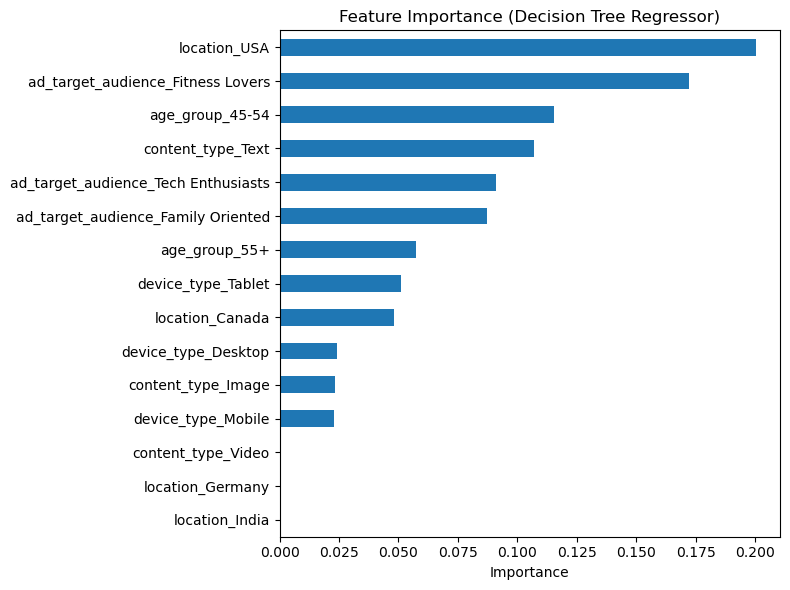

In [32]:
# one-hot，encoded-feather-name
ohe_feature_names = pipe_reg.named_steps["prep"]\
    .named_transformers_["cat"]\
    .get_feature_names_out([c for c in cat_features if c in X.columns]).tolist()
num_feature_names = [c for c in num_features if c in X.columns]
feature_names = ohe_feature_names + num_feature_names

#  feature importance
importances = pipe_reg.named_steps["model"].feature_importances_

import pandas as pd
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("[regression-tree] Feature Importance（top-20）：")
display(feat_imp.head(20))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
feat_imp.head(15).iloc[::-1].plot(kind="barh")
plt.xlabel("Importance")
plt.title("Feature Importance (Decision Tree Regressor)")
plt.tight_layout()
plt.show()